

# Project: Investigate Medical Appointment No shows Dataset 



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>

# 1.1 Introduction

The goal of this project is to investigate a dataset of appoinment records for Brasil public hospitals. The data includes some attributes of patients and state if the patients showed up to appointments. The analysis should be focused on finding trends influencing patients to show or not show up to appointments. Using descriptive statistics the following question should be answered: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? Predictive analytics is out of scope of this project.

The original problem description and data set can be found here: https://www.kaggle.com/joniarroba/noshowappointments/home
This project was completed as part of Udacity's Data Analyst Nanodegree certification.




<a id='wrangling'></a>

## 1.2 Data Wrangling


In this step we do the following:

1- Download our dataset.

2- Check for cleanliness and edit data type in some columns

3 - Variable transformations

4- Created Appointment_day_of_week ,Created Appointment_day_of_week

5- There are no duplicate data in the data set.

6- There are no missing values ​​in the presented data set.

7- Age has a minimum value of -1, lifetime is not expected to be a negative value, so I think it's better to drop it also, the obstacle has a maximum value of 4, and the obstacle values ​​are expected to be 0 or 1 The solution as per the above information finds out that there is Only one negative value (-1) in age Also, the percentage of unwanted values ​​with a handicap is a small percentage of 0.18, so I removed it from the data set


### 1.2.1 Reading the dataset

#Use this cell to set up import statements for all of the packages that you plan to use.


#To start the step of preprossing the dataset is neccessary to import some useful Python libraries.

#Numpy: Is a fundamental package to use linear algebra and random number capabilities. See: www.numpy.org/
#Pandas: Is a package to work with relacional data as tables. See: pandas.pydata.org/
#Matplotlib: is a plotting lybrary, usefull to plot statistical graphics. See: www.matplotlib.org
#Seaborn: is a library based on matplotlib that can draw attrative statistical graphics. See: seaborn.pydata.org/index.html




In [1]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('noshowappointments.csv')


### 1.2.2 Data Assessing


In [3]:
#number of samples 
#Dataset shape
df.shape

(110527, 14)

The Dataset has 110527 record and 14 columns



In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### General observations

1-The dataset have 110527 observations,14 columns and with no null values. The data types of the variables are divided in 8 integer and 6 object.

2-There are 13 independent variables and one dependent (no_show) in the dataset.

3-The dataset does not contain any missing values (NaNs).

5-The scheduled_day and appointment_day columns type should be changed to datetime.

6-no duplicate data exists in the dataset.








In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
# how many null values are there in our dataframe
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
## check the number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
# Check  duplicate rows 
df.duplicated().sum()

0

### 1.2.3 Data Cleaning 

#### Variables transformations

To plot some statistical graphics and for better understanding, we make some transformations in the variables:

PatientId > Patient_ID

AppointmentID > Appointment_ID

Gender > Patient_Sex

ScheduledDay > Scheduled_Day

AppointmentDay > Appointment_Day

Hipertension > Hypertension

handcap > hindrance

In [10]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [11]:
df.rename(columns={'PatientId':'Patient_ID','AppointmentID':'Appointment_ID','Gender':'Patient_Sex',
                     'ScheduledDay':'Scheduled_Day','AppointmentDay':'Appointment_Day',
                     'Hipertension':'Hypertension','Handcap':'hindrance','No-show':'No_show'}, inplace=True)
df.head(5)

,Patient_ID,Appointment_ID,Patient_Sex,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,hindrance,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Convert Appointment Day , Scheduled Day to datatime 

In [48]:
#cheek data type for Scheduled_day,Appointment_day

print(df['Scheduled_Day'].dtype)
print(df['Appointment_Day'].dtype)

datetime64[ns]
datetime64[ns]


In [13]:
#Scheduled_day :Convert the type of the variable from categorical to datetime type
#Appointment_day:Convert the type of the variable from categorical to datetime type
df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day'])
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day'])

In [14]:
# verify 
df['Scheduled_Day']= df['Scheduled_Day'].apply(lambda x:x.strftime('%m-%d-%y'))
df['Scheduled_Day'].head(6)

0    04-29-16
1    04-29-16
2    04-29-16
3    04-29-16
4    04-29-16
5    04-27-16
Name: Scheduled_Day, dtype: object

In [15]:
#  also verify :) 
df['Appointment_Day']= df['Appointment_Day'].apply(lambda x:x.strftime('%m-%d-%y'))
df['Appointment_Day'].head(6)


0    04-29-16
1    04-29-16
2    04-29-16
3    04-29-16
4    04-29-16
5    04-29-16
Name: Appointment_Day, dtype: object

In [16]:
#convert Appointment_day ,Scheduled_day to datatime 

df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day'])
df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day'])

In [17]:
#Greated Appointment_day_of_week
#converting date to day  name 
#  dt.day_name() ,Return the day of the week.
df['Appointment_Day_of_week'] = df['Appointment_Day'].dt.day_name()
df['Appointment_Day_of_week'].head(6)

0    Friday
1    Friday
2    Friday
3    Friday
4    Friday
5    Friday
Name: Appointment_Day_of_week, dtype: object

In [47]:
#Greated Appointment_day_of_week 
#converting date to day  name 
#  dt.day_name() ,Return the day of the week.
df['Scheduled_Day_of_week'] = df['Scheduled_Day'].dt.day_name()
df['Scheduled_Day_of_week'].head(6)

0       Friday
1       Friday
2       Friday
3       Friday
4       Friday
5    Wednesday
Name: Scheduled_Day_of_week, dtype: object

In [19]:
#Appointments per day  no show or show Patients
data_table=df.pivot_table(values="Scheduled_Day_of_week", index=["No_show"], columns="Appointment_Day_of_week",aggfunc=np.count_nonzero)
data_table

Appointment_Day_of_week,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday
No_show,,,,,,
No,14982,18025,30,13909,20488,20774
Yes,4037,4690,9,3338,5152,5093


Less no show ,show of patients if the appointment is on saturday



In [20]:

#check no show value count 

df['No_show'].value_counts()

No     88208
Yes    22319
Name: No_show, dtype: int64

In [21]:
#check Diabetes value count
df['Diabetes'].value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [22]:
#check Hypertension value count
df['Hypertension'].value_counts()

0    88726
1    21801
Name: Hypertension, dtype: int64

In [23]:
#check Scholarship value count
df['Scholarship'].value_counts()


0    99666
1    10861
Name: Scholarship, dtype: int64

In [24]:
# Description of the data
df.describe()

,Patient_ID,Appointment_ID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,hindrance,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### From summary , age has min value -1 ,It is not expected that age is a negative value, so I think it is better to drop it Also, hindrance have a max value of 4 , hindrance values is expected to be 0 or 1

In [25]:
#search  if age = -1 , and count Age
df.query('Age == -1').Age.count()


1

In [26]:
#check unique value for hindrance 
df['hindrance'].unique()

array([0, 1, 2, 3, 4])

In [27]:
#check hindrance value count
df['hindrance'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: hindrance, dtype: int64

In [28]:
## Percentage of total not expected Handcap values  2, ,3, 4
hindrance_unwanted = df['hindrance'].value_counts()
total =hindrance_unwanted[2]+hindrance_unwanted[3]+hindrance_unwanted[4]
(total/df.hindrance.count())* 100

0.18004650447401993

### The information above discovers that there is only one negative value(-1) in age Also, the percentage of unwanted values with hindrance represents a small percentage of 0.18, and therefore I removed it from the dataset



In [29]:
# remove by index value 

negative_age = df.query('Age ==-1').index.values
df.drop(negative_age, inplace=True)

In [30]:
# remove hindrance_unwanted of values 2,3,4
hindrance_unwanted = df.query('hindrance== 2 | hindrance == 3 | hindrance == 4').hindrance
# Drop the values from the dataframe
df.drop(hindrance_unwanted.index, inplace=True)

In [31]:
# Check whether the negative value is removed or not
df['Age'].value_counts()

0      3539
1      2273
52     1741
53     1651
49     1649
56     1634
38     1629
59     1622
2      1618
50     1613
57     1603
36     1579
51     1561
19     1542
39     1535
37     1530
54     1529
34     1524
30     1521
6      1519
33     1516
3      1513
17     1502
32     1500
5      1489
18     1483
44     1482
58     1466
46     1460
21     1451
       ... 
72      615
74      602
76      570
75      542
78      541
77      522
80      511
81      432
79      387
82      383
84      306
83      278
85      272
86      260
87      184
89      161
88      125
90      108
92       86
91       65
93       53
94       32
95       24
96       17
97       10
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [32]:
# Verified hindrance_unwanted value 2,3,4 is removed

df['hindrance'].value_counts()

0    108285
1      2042
Name: hindrance, dtype: int64

## Done Data Wrangling !

# 1.3 Exploratory Data Analysis

## 1- What proportion of appointment shows or no show

In [33]:
# count number of patients show or no show 

df['No_show'].value_counts()

No     88049
Yes    22278
Name: No_show, dtype: int64

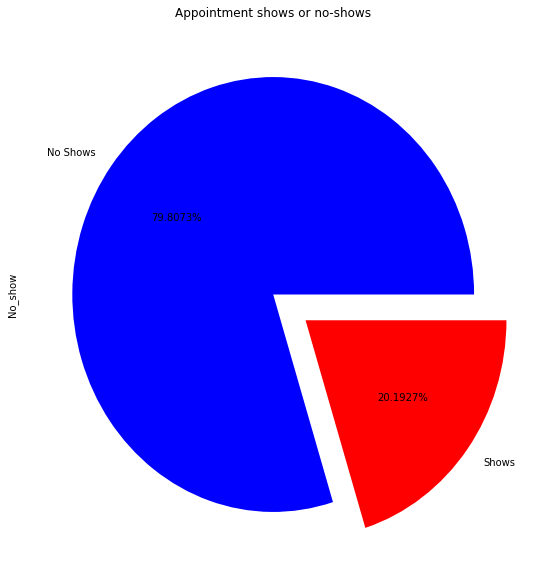

In [34]:
"""
proportion of NoShows as a piechart
"""
df.No_show.value_counts().plot.pie(figsize=(9,10), autopct='%.4f%%', explode=(0, 0.2),colors=['blue','red'],labels =['No Shows', 'Shows'])
plt.title('Appointment shows or no-shows')
plt.show()

## 2- what is the rate of no show by patient sex ?

In [35]:
missed_ppointment=pd.DataFrame(df.groupby('Patient_Sex')['No_show'].count()).apply(lambda x : x / sum(x) * 100)
missed_ppointment

,No_show
Patient_Sex,
F,65.015817
M,34.984183


#### Female patients are more than Male patients in no show , Female 65% of no show ,but Male 34% of no show



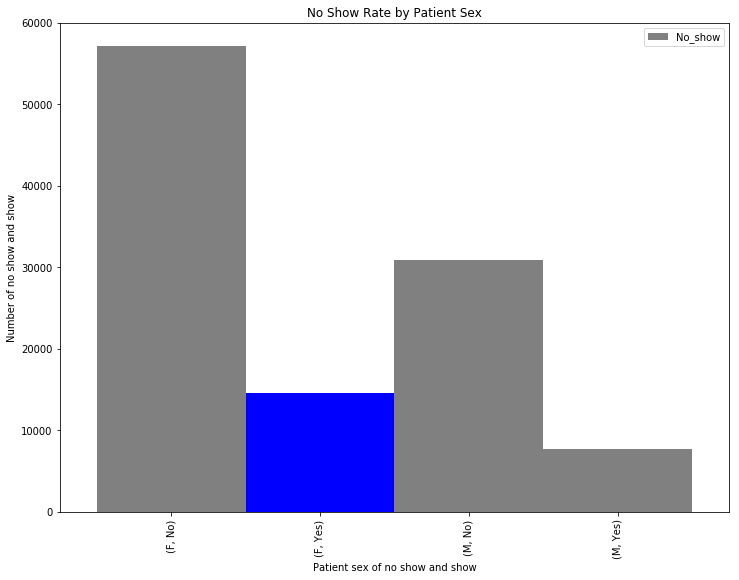

In [51]:
missed_ppointment= df.groupby('Patient_Sex').No_show.value_counts().plot(kind='bar',width =1,figsize=(12,9), color=['Gray','Blue'])
missed_ppointment.set_title("No Show Rate by Patient Sex")
plt.ylabel("Number of no show and show")
plt.xlabel("Patient sex of no show and show")
plt.legend(['No_show','show']);
plt.show()


## 3- What are the ages of people with Alcoholism?

In [52]:
diabetes_by_Patient_ID=pd.DataFrame(df.groupby('Alcoholism')['Patient_ID'].count()).apply(lambda x : x / sum(x) * 100)
diabetes_by_Patient_ID

,Patient_ID
Alcoholism,
0,96.961759
1,3.038241


#### 96.9 Non Alcoholism of patients and 3.0 Alcoholism



In [54]:
#age_classification
bins= [0,10,15,20,25,30,35,40,45,50,55,65,150]
labels = ['Less than 10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','More than 60']
df['classification_by_age'] = pd.cut(df['Age'], bins=bins,labels=labels, right=False)
df.groupby(['classification_by_age'])['Alcoholism'].count()

classification_by_age
Less than 10    17464
10-15            5769
15-20            7128
20-25            6854
25-30            6832
30-35            7498
35-40            7650
40-45            6838
45-50            7351
50-55            8095
55-60           14505
More than 60    14343
Name: Alcoholism, dtype: int64

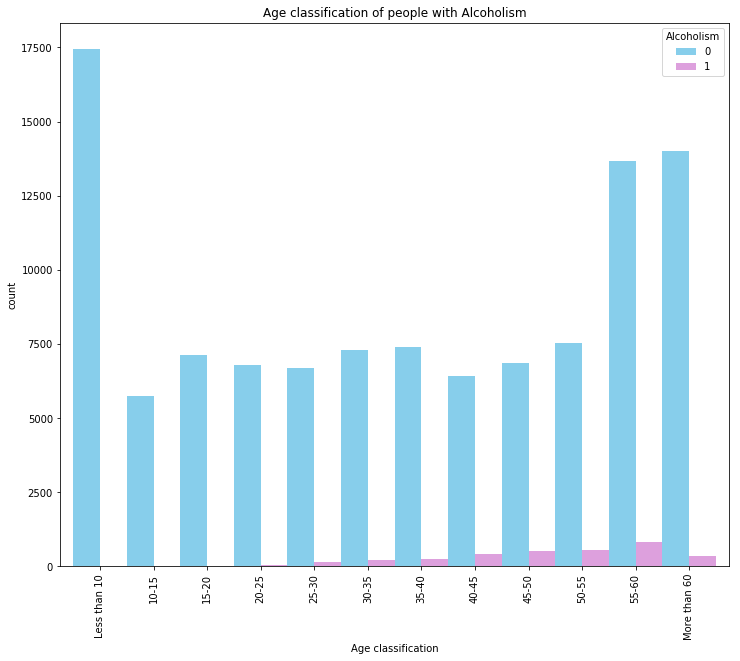

In [55]:
#Percentage of Alcoholism by Age

age = df.groupby('classification_by_age')['Alcoholism'].value_counts().unstack().plot(kind='bar',width =1,figsize=(12,10), color=['skyblue','plum'])
age.set_title("Age classification of people with Alcoholism")
age.set_xlabel('Age classification')
age.set_ylabel('count')
plt.show()

## 4- Are there patients with more than one appointment? If yes, what are the top 10 patients with most appointments?

In [65]:
df.Patient_ID.value_counts().iloc[0:10]


8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
7.579746e+13    62
2.584244e+11    62
6.264199e+12    62
8.713749e+14    62
6.684488e+13    57
8.722785e+11    55
Name: Patient_ID, dtype: int64

There are patients with multiple appointments. The number of appointments of top 10 patients range from 88 to 55. Taking into consideration, that the time range of visits appointed spans over 1.5 months, an appointment is most likely each examination or each specialist visit. So within one patient visit in a hospital, there could be multiple appointments scheduled. One of the no-show reasons could be the fact, that patients could be too tired to take part in all examinations during a particular visit, or the open hours were not sufficient to show up in all appointments. There could be also other reasons. The high number of appointments over so short period of time should be consulted with an SME to decide if performing (or not) additional analysis in this area makes sense.

### Observations : 

The patient's Alcoholism rate Between 40 years and more than 60 years, and the highest incidence of diabetes is those at the age of 60

# Questions

### 1-What proportion of appointment shows or no shows?

finding 79% of the patients are commited to their appointment.

20.19% of all appointments resulted in no shows.

### 2-What is the rate of no show by patient sex

Finding number of female who attended the appointment greater than male

and,number of female who didn't attend the appointment greater than male

### 3- What are the ages of people with Alcoholism?

finding Patients with Alcoholism between the ages of 30 to More than 60

highest incidence of Alcoholism is those at the age of 60 or More

### 4- Are there patients with more than one appointment? If yes, what are the top 10 patients with most appointments?


There are patients with multiple appointments. The number of appointments of top 10 patients range from 88 to 55. Taking into consideration, that the time range of visits appointed spans over 1.5 months, an appointment is most likely each examination or each specialist visit. So within one patient visit in a hospital, there could be multiple appointments scheduled. One of the no-show reasons could be the fact, that patients could be too tired to take part in all examinations during a particular visit, or the open hours were not sufficient to show up in all appointments. There could be also other reasons. The high number of appointments over so short period of time should be consulted with an SME to decide if performing (or not) additional analysis in this area makes sense.

# Conclusions

79% of the patients are commited to their appointment. 20.19% of all appointments resulted in no shows also,number of female who attended the appointment greater than male and,number of female who didn't attend the appointment greater than male


# Limitations:


1- The data set includes mistakes data like age with negtive value and

hindrance have a max value of 4 , hindrance values is expected to be 0 or 1

2- data type for Scheduled_day,Appointment_day object ,import convert to datetime type

3- Variable names are not clear

In [64]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0